In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Read file line by line and take first three characters of each line for pixel and 5th character for mask
def read_file(file):
    with open(file) as f:
        lines = f.readlines()
    pixels = []
    masks = []
    for line in lines:
        pixels.append(line[:3])
        masks.append(line[4])
    return pixels, masks

# Convert pixel values to integers
def convert_pixels(pixels):
    pixels = [int(pixel) for pixel in pixels]
    return pixels

# Convert mask values to integers
def convert_masks(masks):
    masks = [int(mask) for mask in masks]
    return masks

# Create a dataframe with pixel and mask values
def create_dataframe(pixels, masks):
    df = pd.DataFrame({'pixel': pixels, 'mask': masks})
    return df

pixels, masks = read_file('output_file.txt')
pixels = convert_pixels(pixels)
masks = convert_masks(masks)
df = create_dataframe(pixels, masks)

In [4]:
df

,pixel,mask
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
268,0,1
269,0,1
270,0,1
271,0,1


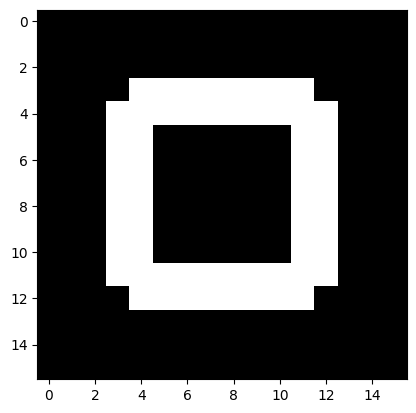

In [5]:
# Keep only rows with mask value 1
df = df[df['mask'] == 1]

# convert pixel values to numpy array
pixels = df['pixel'].values

# reshape pixel values to 2D array of size 16x16
pixels = np.reshape(pixels, (16, 16))

# plot the image
plt.imshow(pixels, cmap='gray')

In [7]:
# read txt function but without mask
def read_txt(file):
    with open(file) as f:
        lines = f.readlines()
    pixels = []
    for line in lines:
        pixels.append(line[:3])
    return pixels

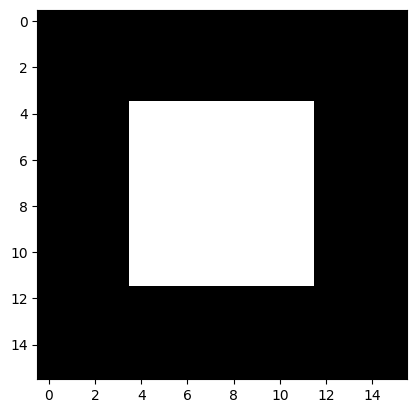

In [10]:
# Read image.txt file and plot the image
input_img = read_txt('image.txt')
input_img = convert_pixels(input_img)

input_img = input_img[:256]

input_img = np.reshape(input_img, (16, 16))
plt.imshow(input_img, cmap='gray')

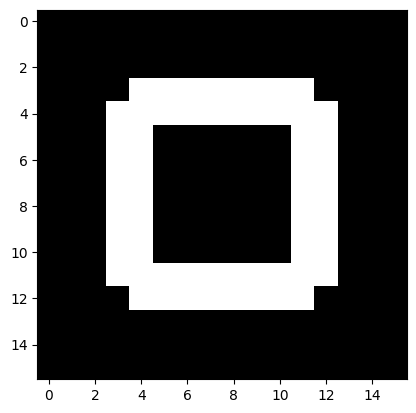

In [11]:
output_img = read_txt('output.txt')
output_img = convert_pixels(output_img)

output_img = output_img[:256]

output_img = np.reshape(output_img, (16, 16))
plt.imshow(output_img, cmap='gray')

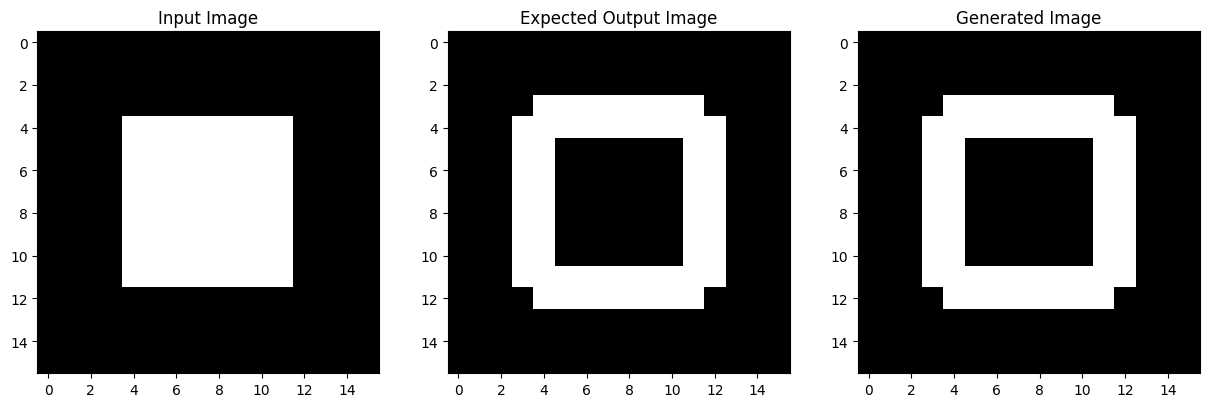

In [14]:
# Plot pixels, input_img and output_img on the same plot
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)
ax[2].imshow(pixels, cmap='gray')
ax[2].set_title('Generated Image')
ax[0].imshow(input_img, cmap='gray')
ax[0].set_title('Input Image')
ax[1].imshow(output_img, cmap='gray')
ax[1].set_title('Expected Output Image')
plt.show()